main setting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(421)

# Create random matrix A
A = np.random.rand(100, 110)

# Create x*
x_star = np.zeros(110)
x_star[2] = 1
x_star[6] = -1

b = A @ x_star

x = np.ones(110)

def objective_function(x, A, b):
    term1 = 0.5 * np.linalg.norm((A @ x) - b)**2
    term2 = np.linalg.norm(x, ord=1)
    return term1 + term2

def soft_thresholding_operator(x, threshold):
    # print(np.abs(x))
    # print(np.abs(x) - threshold)
    # print(np.maximum(np.abs(x) - threshold, 0))
    # input()
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

#### ADMM

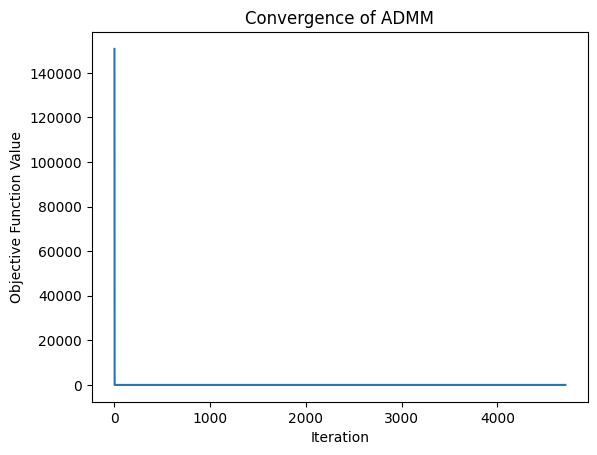

Optimal solution (x_hat): [-6.52272410e-10 -5.76963789e-10  8.77367454e-01 -6.44581222e-10
 -6.75937722e-10 -6.52643786e-10 -8.73217699e-01 -7.34292883e-10
 -6.35267325e-10 -5.80342732e-10 -5.44426490e-10 -5.84635299e-10
 -6.62974953e-10 -7.09273508e-10 -5.78468884e-10 -5.70345521e-10
 -4.30548680e-10 -6.02659124e-10 -6.00032024e-10 -5.71122726e-10
 -5.07512480e-10 -6.21721966e-10 -4.34795894e-10 -6.80559303e-10
 -6.44096625e-10 -5.36381814e-10 -7.65158688e-10 -6.94569402e-10
 -5.24945240e-10 -7.24442915e-10 -5.30918351e-10 -4.84865533e-10
 -6.46809759e-10 -5.60614485e-10 -5.31803705e-10 -3.65170741e-10
 -4.79289970e-10 -8.03741365e-10 -5.02081876e-10 -5.31174108e-10
 -7.24432667e-10 -5.43421350e-10 -5.47589446e-10 -4.37210379e-10
 -6.03582941e-10 -4.66701382e-10 -5.39822298e-10 -5.95995336e-10
 -6.13047946e-10 -6.88852850e-10 -4.78314957e-10 -5.24511705e-10
 -6.40476270e-10 -6.56973531e-10 -5.47077085e-10 -5.03721412e-10
 -6.75869583e-10 -5.45765343e-10 -4.93201417e-10 -5.23479080e-10

In [5]:
def ADMM(A, b, x, rho = 1, lambda_ = 1):
    m, n = A.shape
    z = x.copy()
    y = np.zeros(n)
    obj_values = []

    AAt_inv = np.linalg.inv(A.T @ A + rho * np.identity(n))

    while(1):
        # x-update
        x_new = soft_thresholding_operator(z - (y / rho), lambda_ / rho)

        # z-update
        z_new = AAt_inv @ (A.T @ b + rho * (x_new + y / rho))

        # u-update
        y_new = y + rho * (x_new - z_new)

        # objective function value
        obj_value = objective_function(x, A, b)
        obj_values.append(obj_value)

        # stopping criterion
        if np.linalg.norm(x_new - x) < 1e-10:
            break

        x = x_new
        z = z_new
        y = y_new

    return z, obj_values

x_hat, obj_values = ADMM(A, b, x)

# Plot objective function values
plt.plot(range(len(obj_values)), obj_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence of ADMM')
plt.show()

print("Optimal solution (x_hat):", x_hat)
print("True solution (x_star):", x_star)
print("Final objective function value:", obj_values[-1])


#### ISTA

L 2747.439776230201
[150729.68048093052, 13.431035801051497, 13.277506703568708, 13.128547959377883, 12.981374302636704, 12.835853877731584, 12.701631972561401, 12.571480306976724, 12.443019370380657, 12.316541418718192, 12.193751466653774, 12.073285803669423, 11.954314849972798, 11.836622811147446, 11.720190619600256, 11.60500007107565, 11.491033260668118, 11.379085800838581, 11.268869707666274, 11.161668964735997, 11.05559437006487, 10.95061686080734, 10.848061693514037, 10.74871714290223, 10.651260525406085, 10.55503185773477, 10.459766346711586, 10.365449686543514, 10.27206881048061, 10.179610865786534, 10.088063201731567, 10.001809078742244, 9.917851010434129, 9.83468327687914, 9.752437862166602, 9.673154323155508, 9.596692104787872, 9.521182034637008, 9.447423463344549, 9.37431162863961, 9.301833009895319, 9.229979442303085, 9.158742966300489, 9.088115742997532, 9.018676219961193, 8.951122334322523, 8.884144351524991, 8.818620943845515, 8.754301110390763, 8.691366840759821, 8.630

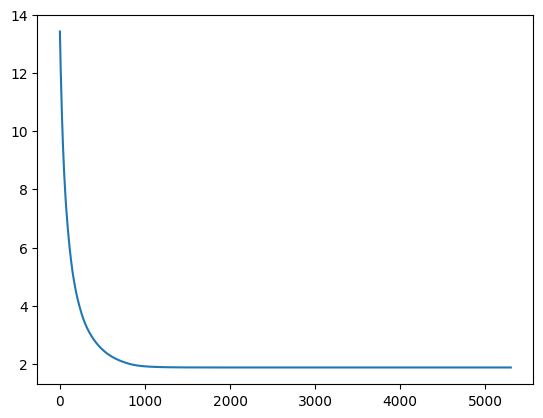

finX [-0.          0.          0.87736719  0.          0.         -0.
 -0.87321748 -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.    

In [5]:
def ISTA(A, b, x, lambda_ = 1):
    objValue = []
    eigenvalues = np.linalg.eigvals(A.T @ A)

    # Find the largest eigenvalue
    L = np.max(np.real(eigenvalues))
    print("L", L)
    k = 0
    while(1):
        # print(k)
        # print(x - ((1/L) * A.T @ (A @ x - b)))
        x_new = soft_thresholding_operator(x - ((1/L) * (A.T @ (A @ x - b))), lambda_ / L)
        # print("delta x", np.linalg.norm(x_new - x))
        # print(np.abs(objective_function(x_new, A, b)))
        if(np.linalg.norm(x_new - x) < 1e-9):
            break
        objValue.append(objective_function(x, A, b))
        x = x_new
        k+=1
    return x, objValue

finX, objValues= ISTA(A, b, x, 1)
import matplotlib.pyplot as plt
plt.plot(range(len(objValues) - 1), objValues[1:])
print(objValues)
plt.show()
print("finX", finX)
print("x_star", x_star)
print(objective_function(x_star, A, b), objValues[-1])

#### FISTA

L 2747.439776230201
[150729.68048093052, 13.431035801051497, 13.235192436773044, 13.00447980942501, 12.7409346474828, 12.465163021457961, 12.166397749455733, 11.849285789077292, 11.509611987619694, 11.157145103631484, 10.793684923803262, 10.429855952245498, 10.05456005536241, 9.693755602657564, 9.345717523164664, 8.996501724836499, 8.660499695098245, 8.346545883667982, 8.040542763120012, 7.7451709729654485, 7.472710134717454, 7.21993874416586, 6.97073939398377, 6.720678576867414, 6.483939746444539, 6.256341602950281, 6.037643227732422, 5.820102063119499, 5.613411472520834, 5.419306703918759, 5.244593773005834, 5.0787178646861895, 4.925296073750326, 4.777970573744836, 4.64089925120985, 4.515294668836312, 4.386556667503097, 4.256321085720143, 4.1149045201033525, 3.9835931446286383, 3.8739006702405625, 3.7754699104485945, 3.6816293595370047, 3.577700156841389, 3.4755451028190283, 3.388617816479721, 3.318923046571653, 3.241913264802262, 3.165688842868179, 3.0870311884372037, 3.006349826730

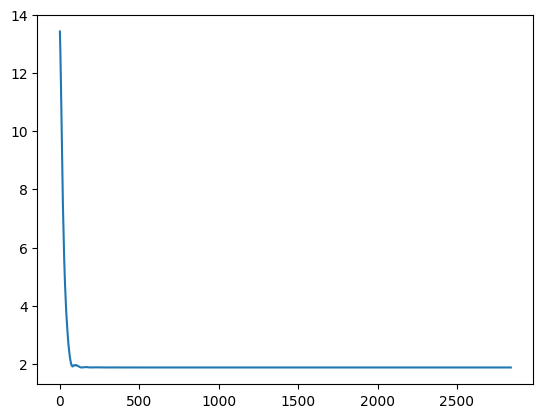

finX [ 0.          0.          0.87735519  0.          0.          0.
 -0.87320501  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.    

In [7]:
def FISTA(A, b, x, lambda_ = 1):
    objValue = []
    eigenvalues = np.linalg.eigvals(A.T @ A)

    # Find the largest eigenvalue
    L = np.max(np.real(eigenvalues))
    print("L", L)
    k = 0
    t = 1
    y = x
    while(1):
        y_new = soft_thresholding_operator(x - ((1/L) * (A.T @ (A @ x - b))), lambda_ / L)
        t_new = (1 + np.sqrt(1 + 4 * t ** 2)) / 2
        x_new = y_new + ((t - 1) / t_new) * (y_new - y)
        if(np.linalg.norm(x_new - x) < 1e-9):
            break
        objValue.append(objective_function(x, A, b))
        x = x_new
        k+=1
        t = t_new
        y = y_new
    return x, objValue
finX, objValues= FISTA(A, b, x, 1)
import matplotlib.pyplot as plt
plt.plot(range(len(objValues) - 1), objValues[1:])
print(objValues)
plt.show()
print("finX", finX)
print("x_star", x_star)
print(objective_function(x_star, A, b), objValues[-1])